In [1]:
import matplotlib.pyplot as plt
import os

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

root_work_dir = './Work_dirs/work_dirs_external/'

#img_type = 'rgb'

#time_stamps = ['20200215_1046', '20200215_0518','20200216_1938', '20200214_1620','20200214_2057', '20200214_1621']
#lrs = ['0.001','0.0005' ,' 0.0001', '0.00005', '0.00003','0.00001' ]

#img_type = 'infrared'
#time_stamps = ['20200215_1058','20200216_2009', '20200216_1933', '20200216_1956','20200216_1936', '20200216_1932','20200215_1059']
#lrs = ['0.0005','0.00025', '0.0001', '7.5e-05', '5e-05' , '1e-05','5e-06']
#img_type = 'infrared'
#time_stamps = ['20200221_1432','20200221_1758', '20200218_1929']
#lrs = ['new_loss', 'new_loss freeze 2', 'old_loss']

img_type = 'rgb'
time_stamps = ['20200225_1443',
               '20200225_1450',
               '20200226_2027',
               '20200227_0920',
               '20200228_0711',
               '20200226_2028',
               '20200226_2040',
               '20200225_1448',
               '20200229_2057',
               '20200225_1439']
lrs = ['160',
       '320',
       '384',
       '512',
       '640',
       '768',
       '896',
       '1024',
       '1152',
       '1280']#, 'baseline1280']


#img_type = 'ensemble'
#time_stamps = ['20200217_2021', '20200217_2312', '20200217_2351','20200217_1624','20200217_2055','20200217_1747']
#lrs = ['0.0005', '0.0001','0.000075','0.00005','0.00001','0.000005']
#time_stamps = [ '20200219_1221','20200224_0830']
#lrs = ['old','new' ]

img_type = 'infrared'
#time_stamps = ['20200309_0854',
#               ['20200306_1536', '20200310_0908'],
#               ['20200309_1415','20200310_0845'],
#               '20200311_1421',
#               '20200311_1422',               
#               '20200311_1525']
#lrs = ['2', '4','8','16','32','64'] #Batch size

time_stamps = ['20200311_1422',
               '20200312_1303',
               '20200312_1306',
               '20200312_1309']
lrs = ['64', '96','128','160']
        
        
fig, ax = plt.subplots(figsize=(15,10))

i = 0

for time_stamp in time_stamps:
    
    
    if type(time_stamp) == type([]):
        train_loss = []
        VAL_loss = []
        for ts in time_stamp:
            work_dir = root_work_dir+ img_type +'/' + ts
            with open( os.path.join(work_dir, 'TRAIN_LOSS.txt' ), 'r') as f:
                train_loss = [*train_loss, *list(map(float,  f.readlines()[0].split() )) ]

            with open( os.path.join(work_dir, 'VALIDATION_LOSS.txt' ), 'r') as f:
                VAL_loss = [*VAL_loss, *list(map(float,  f.readlines()[0].split() ))]
    else:
        work_dir = root_work_dir+ img_type +'/' + time_stamp
        with open( os.path.join(work_dir, 'TRAIN_LOSS.txt' ), 'r') as f:
            train_loss = list(map(float,  f.readlines()[0].split() )) 

        with open( os.path.join(work_dir, 'VALIDATION_LOSS.txt' ), 'r') as f:
            VAL_loss = list(map(float,  f.readlines()[0].split() )) 

    
    #ax.plot( train_loss, label= lrs[i] )
    ax.plot( VAL_loss, label='VALIDATION ' + lrs[i] + ' ' + str(time_stamp))
    
    i = i+1
    


    
plt.yticks( fontsize=12)
plt.xticks( fontsize=12)
ax.legend(fontsize=16)
plt.ylabel('Loss', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#ax.yaxis.grid()
#plt.ylim((0.12,0.35))
ax.grid()

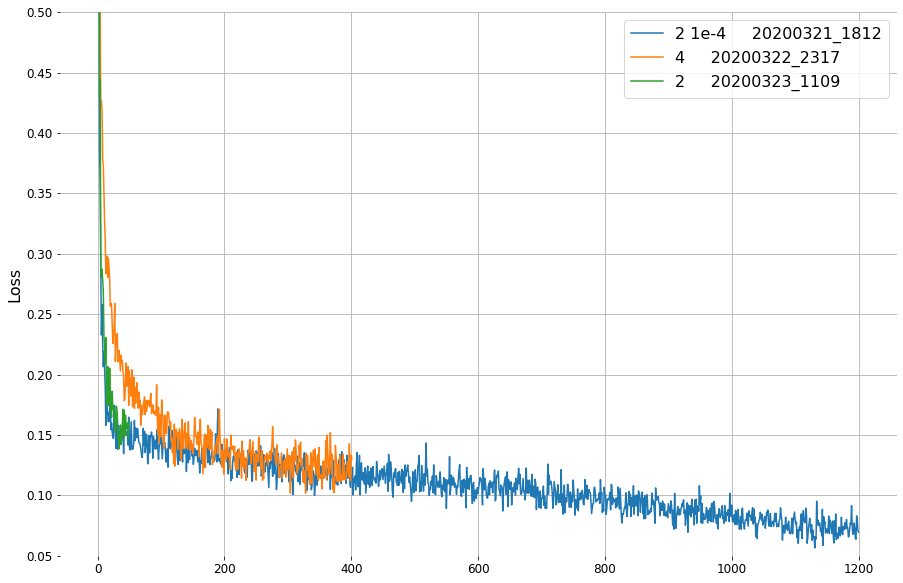

In [4]:
root_work_dir = './Work_dirs/work_dirs_external/'

img_type = 'ensemble'
#'20200306_1628'
#'4'
time_stamps = ['20200313_0915','20200313_0928','20200314_2125','20200313_1909', '20200314_2044']#,'20200222_0826'] #]#
lrs = ['1e-5','4e-5', '7e-5','1e-4', '5e-4']#, 'baseline1280']

#512, 64
time_stamps = ['20200313_1909','20200313_0928','20200317_1321','20200317_1019']#,'20200315_2150','20200315_1924','20200314_2313']
lrs = ['1024 128','1024 128','1024 64','768 96']#,'640 160','512 128','512 64']
 
    
time_stamps= ['20200321_1812','20200322_2317','20200323_1109']#
lrs = ['2 1e-4','4','2']#

fig, ax = plt.subplots(figsize=(15,10))

i = 0

for time_stamp in time_stamps:
    work_dir = root_work_dir+ img_type +'/' + time_stamp
    
    with open( os.path.join(work_dir, 'TRAIN_LOSS.txt' ), 'r') as f:
        train_loss = list(map(float,  f.readlines()[0].split() )) 
        
    with open( os.path.join(work_dir, 'VALIDATION_LOSS.txt' ), 'r') as f:
        VAL_loss = list(map(float,  f.readlines()[0].split() )) 

    #if len(train_loss) > 400:
    #    ax.plot( train_loss[:400], label= lrs[i] + '     ' + time_stamp)
    #else:
    ax.plot( train_loss, label= lrs[i] + '     ' + time_stamp)
    #ax.plot( VAL_loss, label='VALIDATION ' + lrs[i] + ' ' + time_stamp)
    
    i = i+1
    


    
plt.yticks( fontsize=12)
plt.xticks( fontsize=12)
ax.legend(fontsize=16)
plt.ylabel('Loss', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#ax.yaxis.grid()
plt.ylim((0.05,0.5))
ax.grid()

#### root_work_dir = './Work_dirs/work_dirs_external/'

img_type = 'rgb'
#
#
time_stamps = ['20200309_1926','20200309_1928','20200309_1933','20200311_1451']
lrs = ['2','4','8','16']
     
        
fig, ax = plt.subplots(figsize=(15,10))

i = 0

for time_stamp in time_stamps:
    work_dir = root_work_dir+ img_type +'/' + time_stamp
    
    with open( os.path.join(work_dir, 'TRAIN_LOSS.txt' ), 'r') as f:
        train_loss = list(map(float,  f.readlines()[0].split() )) 
        
    with open( os.path.join(work_dir, 'VALIDATION_LOSS.txt' ), 'r') as f:
        VAL_loss = list(map(float,  f.readlines()[0].split() )) 

    
    ax.plot( train_loss, label= lrs[i] + '     ' + time_stamp)
    #ax.plot( VAL_loss, label='VALIDATION ' + lrs[i] + ' ' + time_stamp)
    
    i = i+1
    


    
plt.yticks( fontsize=12)
plt.xticks( fontsize=12)
ax.legend(fontsize=16)
plt.ylabel('Loss', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#ax.yaxis.grid()
#plt.ylim((0.05,0.5))
ax.grid()